# Linear regression with SGD

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
boston.data.shape

(506, 13)

In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
bos_df = pd.DataFrame(boston.data)
print(bos_df.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [9]:
bos_df['Price'] = boston.target
X=bos_df.drop('Price',axis=1)
y=bos_df['Price']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=5)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


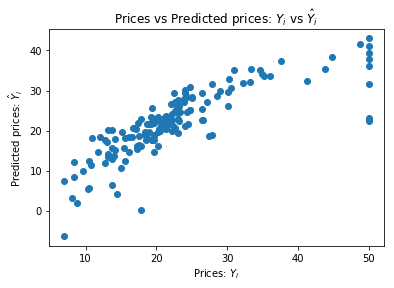

In [12]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

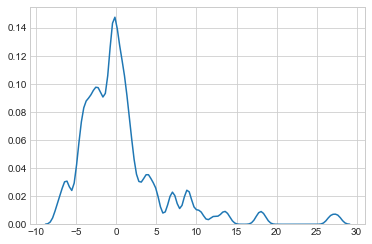

In [13]:
delta_Y = (Y_test-Y_pred)
sns.set_style("whitegrid")
sns.kdeplot(np.array(delta_Y),bw=0.5)
plt.show()

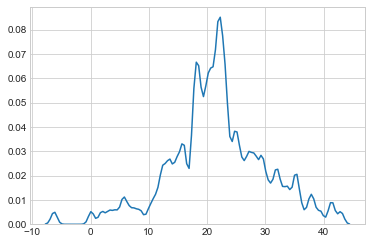

In [14]:

sns.set_style("whitegrid")
sns.kdeplot(np.array(Y_pred),bw=0.5)
plt.show()

# FUNCTION FOR SGD

In [998]:
import random
from sklearn import preprocessing

def sgd(X1,Y1,learning_rate,iterations,K):
    
    W_gradient=0
    b_gradient=0
    b = 0.0
    W_0=[0.0 for i in range(len(X1[0]))]

    for iteration in range(iterations):
    
        N=random.sample(range(len(X1)),K)
        for i in N:
            
            Y_hat=predict(X1[i],W_0,b)
            W_gradient= -2*(1/K)*X1[i]*(Y1[i]-Y_hat)
            b_gradient= -2*(1/K)*(Y1[i]-(Y_hat))
            b_new=b-learning_rate* b_gradient
            W_new=W_0-learning_rate* W_gradient
            W_0=W_new
            b=b_new
    return W_new,b
       

In [498]:
def predict(X,w,b):
    Y_hat=b
    for i in range(len(X)):
        Y_hat+=w[i]*X[i]
    return Y_hat

In [948]:
X=bos_df.drop('Price',axis=1)
Y=bos_df['Price']

In [949]:
final_X=np.asarray(X)
final_Y=np.asarray(Y)
import sklearn.cross_validation
X_train,X_test,Y_train,Y_test=sklearn.cross_validation.train_test_split(final_X,final_Y,test_size=0.3)

In [950]:
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
S.fit(X_train,Y_train)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [951]:
X_train.shape

(354, 13)

In [1014]:
W1,B1 = sgd(X_train,Y_train,1e-6,1000000,30)

In [1015]:
W1

array([-0.08960468,  0.07961564, -0.00687018,  0.25142445,  0.1520337 ,
        4.08560604,  0.01292641, -0.73343723,  0.18511533, -0.01244438,
        0.01557315,  0.01818562, -0.50060617])

In [1028]:
B1

0.4100295721824357

# SKLEARN SGD REGRESSOR

In [1024]:
from sklearn import linear_model
clf = linear_model.SGDRegressor(learning_rate='constant', n_iter=100000,eta0=1e-6)


clf.fit(X_train,Y_train)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=1e-06,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=None, n_iter=100000, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [1025]:
Y_pred = clf.predict(X_test)

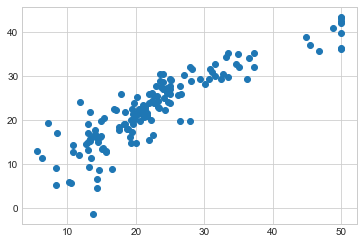

In [805]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred)

In [1027]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

27.36005254104615

# OUR DEFINED SGD REGRESSOR

In [1018]:
Y_predicted=[]
for t in range(len(X_test)):
    Y_hat=predict(X_test[t],W1,B1)
    Y_predicted.append(Y_hat)

In [1019]:
Y_predicted

[22.94234481937479,
 29.860730387659917,
 20.83957058329079,
 26.15780844657683,
 22.56967417796679,
 21.569130892314096,
 24.145331980483974,
 10.916942911862298,
 20.90014725866495,
 21.693617555484664,
 23.50934847341263,
 14.193288660209921,
 33.29740272274727,
 22.58094684291388,
 17.778414973798448,
 34.146430012649084,
 21.923774898561497,
 25.27761908150174,
 17.936973598742092,
 25.18492425409397,
 14.937828222230413,
 22.97216584235328,
 17.973989797185684,
 18.435490017030943,
 28.72511376614576,
 9.162184723736994,
 25.50238602165671,
 22.37380212937235,
 23.378615713744033,
 25.90741089666404,
 10.929504205953062,
 30.997075755351883,
 6.511457837603096,
 20.838355941922934,
 26.455818921184367,
 10.589793280257787,
 10.85835831649927,
 18.17661277504292,
 14.277861954238025,
 29.978271906226386,
 28.47652954925149,
 34.985278286070084,
 21.849250459166726,
 23.306161030237185,
 21.754912916268392,
 18.811591472440057,
 22.622555658782257,
 22.36087498299847,
 16.660479991

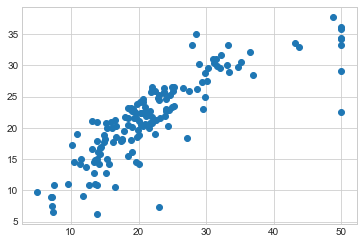

In [1020]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_predicted)

In [1022]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_predicted)


29.342666594973526

# OBSERVATION

1.mean square error corresponding to our sgd and sklearn sgd is very similar



2.the plot between Y_test and Y_predicted of both our sgd and sklearn sgd shows similar behaviour

3.IT shows that our sgd is a strong optimization for linear regression as sklearn sgd